In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'): #/kaggle/input/playground-series-s5e6/
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

.\sample_submission.csv
.\solution_file.ipynb
.\submission.csv
.\test.csv
.\train.csv
.\catboost_info\catboost_training.json
.\catboost_info\learn_error.tsv
.\catboost_info\test_error.tsv
.\catboost_info\time_left.tsv
.\catboost_info\learn\events.out.tfevents
.\catboost_info\test\events.out.tfevents


# 1). Set Up the Environment

In [2]:
# IMPORT BASE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# IMPORT DATASETS (TRAIN & TEST)
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# 2). Exploratory Data Analysis

In [4]:


# Visualise the train dataset...
print("\n----------FIRST FIVE INSTANCES IN TRAIN----------\n")
display(train_data.head())
print("\n----------TRAIN DATA INFORMATION----------\n")
display(train_data.info())
print("\n----------TRAIN DATA SUMMARY STATS----------\n")
display(train_data.describe())

# Visualise the test dataset...
print("\n----------FIRST FIVE INSTANCES IN TEST----------\n")
display(test_data.head())
print("\n----------TEST DATA INFORMATION----------\n")
display(test_data.info())
print("\n----------TEST DATA SUMMARY STATS----------\n")
display(test_data.describe())




----------FIRST FIVE INSTANCES IN TRAIN----------



,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1



----------TRAIN DATA INFORMATION----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 10

None


----------TRAIN DATA SUMMARY STATS----------



,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000



----------FIRST FIVE INSTANCES IN TEST----------



,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown



----------TEST DATA INFORMATION----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


None


----------TEST DATA SUMMARY STATS----------



,id,age,balance,day,duration,campaign,pdays,previous
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,40.932332,1197.426352,16.116068,255.342260,2.573548,22.280028,0.303728
std,72168.927986,10.081613,2741.520699,8.258509,271.404326,2.709661,76.915879,1.384574
min,750000.000000,18.000000,-8019.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,812499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000
50%,874999.500000,39.000000,631.000000,17.000000,133.000000,2.000000,-1.000000,0.000000
75%,937499.250000,48.000000,1389.000000,21.000000,353.000000,3.000000,-1.000000,0.000000
max,999999.000000,95.000000,98517.000000,31.000000,4918.000000,58.000000,871.000000,150.000000



Key Takeaways

- No missing data in both the train and test datasets
- Train dataset contains 750,000 examples with 18 variables
- Test dataset contains 250,000 examples with 17 variables (excluding the target variable)

2a). Histograms and Correlation Matrix for all numeric variables

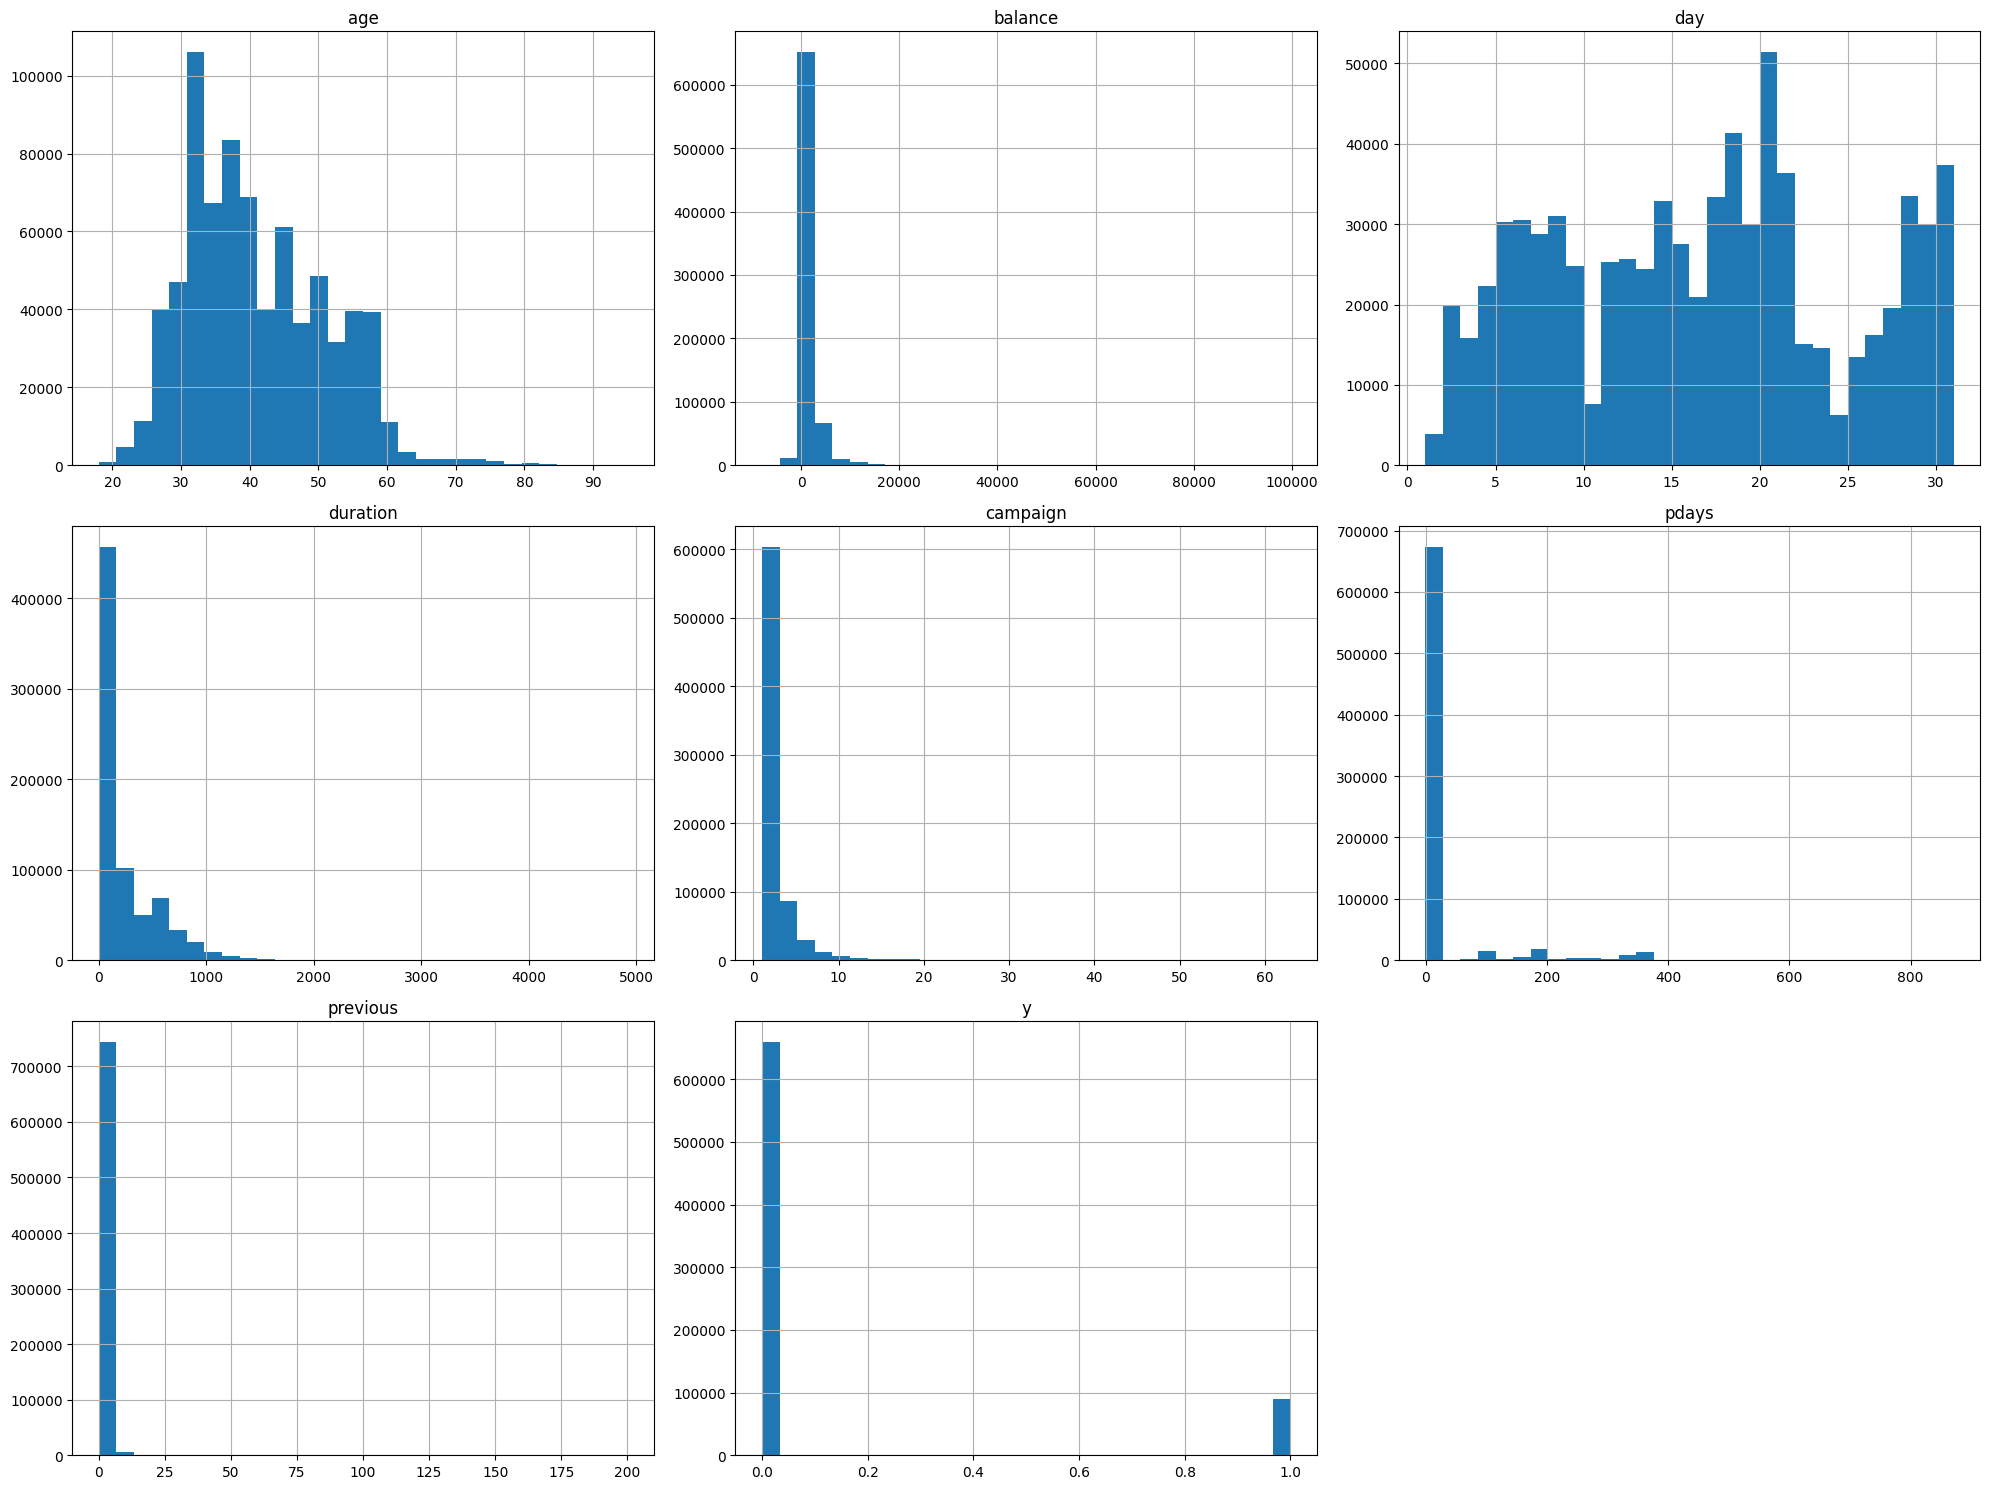

In [5]:

# Drop id variable
train_data_v2 = train_data.copy()
train_data_v2.drop(["id"], axis=1, inplace=True)

# Plot histograms for all numeric columns
train_data_v2.hist(figsize=(20, 15), bins=30, layout=(-1, 3))  # Adjust layout based on # of columns
plt.tight_layout()
plt.show()

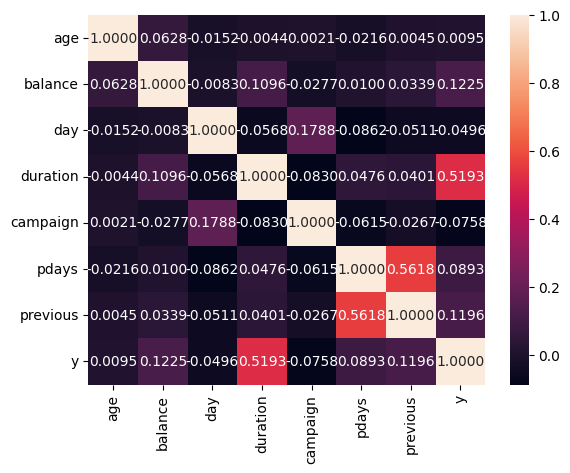

In [6]:
# Correlation Matrix
sns.heatmap(
    train_data_v2.select_dtypes(include=np.number).corr(),
    annot=True,
    fmt=".4f"
)
plt.show()

2b). Barplots for categorical variables

C:\Users\User\AppData\Local\Temp\ipykernel_16140\2232031937.py:4: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or pd.api.types.is_categorical_dtype(train_data_v2[col])]  # Explicit categories


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


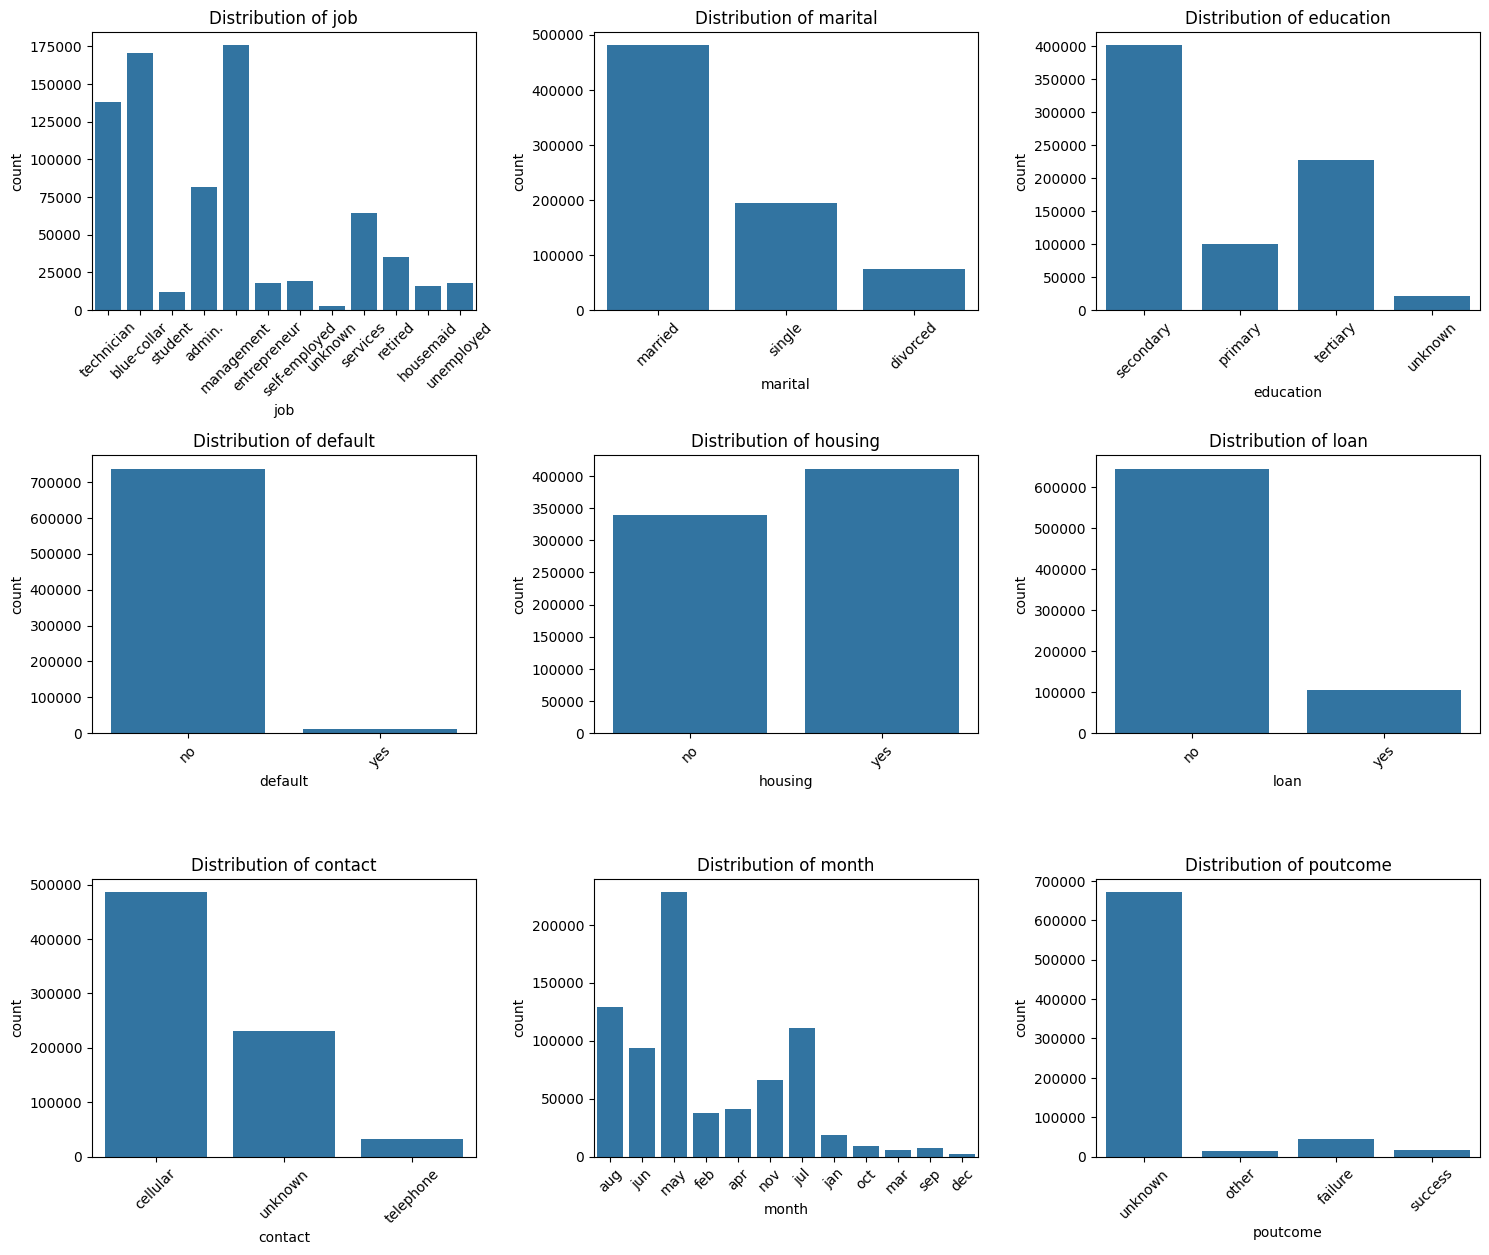

In [7]:

# Auto-detect categorical columns (adjust max_unique as needed)
categorical_cols = [col for col in train_data_v2.columns 
                    if  pd.api.types.is_string_dtype(train_data_v2[col])  # Strings
                    or pd.api.types.is_categorical_dtype(train_data_v2[col])]  # Explicit categories

print("Categorical columns:", categorical_cols)

# Set up subplots
n_cols = 3  # Number of columns in the grid
n_rows = len(categorical_cols) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each categorical variable
for i, col in enumerate(categorical_cols):
    sns.countplot(data=train_data_v2, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



# 3). Model Selection, Preprocessing and Training

In [8]:
# Import preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:

# Importing training libraries
import optuna
from catboost import CatBoostClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


## 3a). CatBoost

3ai). Preprocessing

In [35]:

# Split train data into X and y
X, y = train_data.iloc[:, :17], train_data.iloc[:, 17]

# numerical columns
num_vars = X.select_dtypes(include=np.number).columns.tolist()
# categorical columns
cat_vars = X.select_dtypes(exclude=np.number).columns.tolist()

# data transformation pipeline
data_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars) # Numerical: Standardized (mean=0, variance=1) using StandardScaler
], 
remainder='passthrough' # Categorical: Not Transformed since CatBoost can handle
)

3aii). Initial CatBoost Model

In [41]:
# Fit the model with initial parameters

params = {
    "iterations": 200,           # Early stopping will likely cut this down
    "learning_rate": 0.05,        # Balanced speed/performance
    "depth": 6,                   # Optimal for moderate feature count
    "l2_leaf_reg": 3,             # Mild regularization to prevent overfitting
    "random_strength": 1,         # Controls randomness in splits
    "bagging_temperature": 0.5,    # For stochastic gradient boosting
    "border_count": 254,           # Default (good for large datasets)
    "auto_class_weights": 'Balanced',  # Handles class imbalance if present
    "loss_function": 'Logloss',    # Binary cross-entropy
    "eval_metric": 'AUC',          # Optimize for AUC (or 'Accuracy'/'F1')
    "task_type": 'CPU',            # Use 'GPU' if available
    "early_stopping_rounds": 50,   # Stop if no improvement after 50 rounds
    "verbose": 100                # Print progress every 100 iterations
}

# CatBoost Model with the initial params
aucs = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_v2 = data_pipeline.fit_transform(X_train)
    X_val_v2 = data_pipeline.transform(X_val)
    
    # Get categorical indices (assuming categoricals are last N columns)
    cat_indices = list(range(X_train.shape[1] - len(cat_vars), X_train.shape[1]))

    catboost_model_init = CatBoostClassifier(**params, random_seed=fold, cat_features=cat_indices)
    
    catboost_model_init.fit(X_train_v2, y_train,
                       eval_set=(X_val_v2, y_val),  # Add validation set
                       use_best_model=True,        # Essential for early stopping
                       ) # Fit model to the training data
    y_scores = catboost_model_init.predict_proba(X_val_v2)
    y_scores_class1 = y_scores[:, 1] # Extract probabilities for class 1 (second column)
    
    y_proba = catboost_model_init.predict_proba(X_val_v2)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"Fold {fold+1} AUC: {auc:.4f}")
    aucs.append(auc)

print(f"\nMean AUC: {np.mean(aucs):.4f} (±{np.std(aucs):.4f})")

0:	test: 0.9232088	best: 0.9232088 (0)	total: 597ms	remaining: 1m 58s
100:	test: 0.9579778	best: 0.9579778 (100)	total: 42.6s	remaining: 41.7s
199:	test: 0.9613960	best: 0.9613960 (199)	total: 1m 26s	remaining: 0us

bestTest = 0.9613960276
bestIteration = 199

Fold 1 AUC: 0.9614
0:	test: 0.9219086	best: 0.9219086 (0)	total: 455ms	remaining: 1m 30s


KeyboardInterrupt: 

3aiii). Setting up Optuna for hyperparameter tuning (CatBoost)

In [ ]:
def xgboost_objective(trial):
    # Define xgboost's parameter space
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'gamma': trial.suggest_float('gamma', 0.0, 3.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10),
        'subsample': trial.suggest_float('subsample', 0, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 15_000),
    }

    # DEFINE A CROSS-VALIDATION LOOP
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    map3_scores = []

    # Encord target labels to (1, 2, 3, 4, 5,...)
    lab_encoder = LabelEncoder()
    y_train_encoded = lab_encoder.fit_transform(y_train) 

    # For each fold, slice X_train_v2 & y_train_v2 by the indices
    for train_index, val_index in cv.split(X_train_v2, y_train_encoded):
        x_train_fold = X_train_v2[train_index]
        x_val_fold = X_train_v2[val_index]

        y_train_fold = y_train_encoded[train_index]
        y_val_fold = y_train_encoded[val_index]
        
        # The model
        model = xgb.XGBClassifier(
            **params,
            verbosity=0,
            objective='multi:softprob',
            enable_categorical=True,
            tree_method="gpu_hist", # Use the GPU
            predictor="gpu_predictor",
            n_jobs=-1,
            device="cuda",
            random_seed=42
        )
        
        # Fit the model
        model.fit(x_train_fold, y_train_fold, eval_set=[(x_val_fold, y_val_fold)],
              early_stopping_rounds=50, verbose=False)
        # Prediction probas
        pred_proba = model.predict_proba(x_val_fold)

        fold_auc = roc_auc()
        auc_scores.append(fold_auc)
        mean_aoc = np.mean(auc_scores)

        return mean_aoc 

3aiv). CatBoost Model with the best parameters from Optuna

3av). CatBoost inference on the test data

## 3b). XGBoost

3bi). Preprocessing

In [27]:
# Split train data into X and y
X, y = train_data.iloc[:, :17], train_data.iloc[:, 17]

# numerical columns
num_vars = X.select_dtypes(include=np.number).columns.tolist()
# categorical columns
cat_vars = X.select_dtypes(exclude=np.number).columns.tolist()

# data transformation pipeline
data_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars), # Numerical: Standardized (mean=0, variance=1) using StandardScaler
    ("cat", OneHotEncoder(), cat_vars) # Categorical: One-hot encoded (dummy variables) using OneHotEncoder
])

3bii). Initial XGB model

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "scale_pos_weight": sum(y==0) / sum(y==1),  # For imbalanced classes
    "n_jobs": -1,
    "max_depth": 6,
    "learning_rate": 0.05,
    "subsample": 0.9,
    "colsample_bytree": 0.8,
    "n_estimators": 200
}

# XGB Model with the initial params
aucs = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_v2 = data_pipeline.fit_transform(X_train)
    X_val_v2 = data_pipeline.transform(X_val)
    
    xgb_model_init = xgb.XGBClassifier(
        **params,
        early_stopping_rounds=50,
        verbosity=0
    )
    
    xgb_model_init.fit(
        X_train_v2, y_train,
        eval_set=[(X_val_v2, y_val)],
        verbose=50  # Training progress
    )
    
    y_proba = xgb_model_init.predict_proba(X_val_v2)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"Fold {fold+1} AUC: {auc:.4f}")
    aucs.append(auc)

print(f"\nMean AUC: {np.mean(aucs):.4f} (±{np.std(aucs):.4f})")

[0]	validation_0-auc:0.93533
[50]	validation_0-auc:0.95422
[100]	validation_0-auc:0.95875
[150]	validation_0-auc:0.96140
[199]	validation_0-auc:0.96303
Fold 1 AUC: 0.9630
[0]	validation_0-auc:0.93517
[50]	validation_0-auc:0.95412
[100]	validation_0-auc:0.95880
[150]	validation_0-auc:0.96124
[199]	validation_0-auc:0.96287
Fold 2 AUC: 0.9629
[0]	validation_0-auc:0.93536
[50]	validation_0-auc:0.95455
[100]	validation_0-auc:0.95892
[150]	validation_0-auc:0.96163
[199]	validation_0-auc:0.96308
Fold 3 AUC: 0.9631

Mean AUC: 0.9630 (±0.0001)


3biii). Setting up Optuna for hyperparameter tuning (XGBoost)

In [ ]:
def xgboost_objective(trial):
    # Define xgboost's parameter space
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'gamma': trial.suggest_float('gamma', 0.0, 3.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10),
        'subsample': trial.suggest_float('subsample', 0, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 15_000),
    }

    # DEFINE A CROSS-VALIDATION LOOP
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    map3_scores = []

    # Encord target labels to (1, 2, 3, 4, 5,...)
    lab_encoder = LabelEncoder()
    y_train_encoded = lab_encoder.fit_transform(y_train) 

    # For each fold, slice X_train_v2 & y_train_v2 by the indices
    for train_index, val_index in cv.split(X_train_v2, y_train_encoded):
        x_train_fold = X_train_v2[train_index]
        x_val_fold = X_train_v2[val_index]

        y_train_fold = y_train_encoded[train_index]
        y_val_fold = y_train_encoded[val_index]
        
        # The model
        model = xgb.XGBClassifier(
            **params,
            verbosity=0,
            objective='multi:softprob',
            enable_categorical=True,
            tree_method="gpu_hist", # Use the GPU
            predictor="gpu_predictor",
            n_jobs=-1,
            device="cuda",
            random_seed=42
        )
        
        # Fit the model
        model.fit(x_train_fold, y_train_fold, eval_set=[(x_val_fold, y_val_fold)],
              early_stopping_rounds=50, verbose=False)
        # Prediction probas
        pred_proba = model.predict_proba(x_val_fold)

        fold_auc = roc_auc()
        auc_scores.append(fold_auc)
        mean_aoc = np.mean(auc_scores)

        return mean_aoc 

In [ ]:
study_2 = optuna.create_study(direction="maximize", sampler=TPESampler(n_startup_trials=30, seed=42, multivariate=True))
study_2.optimize(xgboost_objective, n_trials=50, n_jobs=-1)

In [ ]:
# The best parameters for xgboost
xgb_best_params = study_2.best_params
xgb_best_params

3biv). XGB model with the best parameters from Optuna

In [ ]:
# Encord target labels to (1, 2, 3, 4, 5,...)
lab_encoder_train = LabelEncoder() # for y_train
lab_encoder_test = LabelEncoder() # for y_test
y_train_encoded = lab_encoder_train.fit_transform(y_train) 
y_test_encoded = lab_encoder_test.fit_transform(y_test)

# Best parameters obtained from the previous optuna job
xgb_best_params = {'learning_rate': 0.0855138611826152,
 'max_depth': 305,
 'min_child_weight': 16,
 'gamma': 0.26409924765908566,
 'reg_alpha': 0.0021104826613006014,
 'reg_lambda': 0.08981634779333057,
 'subsample': 0.2653850247835302,
 'colsample_bytree': 0.1378307171917018,
 'n_estimators': 11930}

# XGB Model with the best params from optuna
xgb_model = xgb.XGBClassifier(
    **xgb_best_params,
    verbosity=0,
    objective='multi:softprob',
    enable_categorical=True,
    # tree_method="gpu_hist",
    # gpu_id=0, 
    n_jobs=-1,
    random_seed=42
)
xgb_model.fit(X_train_v2, y_train_encoded)
xgb_pred_proba = xgb_model.predict_proba(X_test_v2)

top3_index2 = np.argsort(xgb_pred_proba, axis=1)[:, -3:][:, ::-1]
class_labels2 = xgb_model.classes_
top3_labels2 = class_labels2[top3_index2]

xgb_auc = roc_auc(top3_labels2, y_test_encoded)
print(f"MAP@3 Score: {xgb_auc}")

KeyboardInterrupt: 

3bv). Select final model

In [30]:
#FINAL MODEL
final_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars),
    ("cat", OneHotEncoder(), cat_vars)
])

X_v2 = final_pipeline.fit_transform(X)
final_model = xgb.XGBClassifier(**params).fit(X_v2, y, verbose=50)
print(f"Final training complete")

Final training complete


## 3c). Random Forest

In [20]:
# Split train data into X and y
X, y = train_data.iloc[:, :17], train_data.iloc[:, 17]

# numerical columns
num_vars = X.select_dtypes(include=np.number).columns.tolist()
# categorical columns
cat_vars = X.select_dtypes(exclude=np.number).columns.tolist()

# data transformation pipeline
data_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars), # Numerical: Standardized (mean=0, variance=1) using StandardScaler
    ("cat", OneHotEncoder(), cat_vars) # Categorical: One-hot encoded (dummy variables) using OneHotEncoder
])

In [ ]:
# Initialize with defaults
params = {
    "n_estimators": 200,    # Number of trees
    "max_depth": 10,           # Control tree complexity
    "min_samples_split": 20,    # Prevent overfitting
    "class_weight": 'balanced', # Handles imbalanced classes
    "n_jobs": -1,              # Use all CPU cores
    "random_state": 42,
    "max_samples": 0.8,
    "verbose": 1
}

# XGB Model with the initial params
aucs = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_v2 = data_pipeline.fit_transform(X_train)
    X_val_v2 = data_pipeline.transform(X_val)
    
    model = RandomForestClassifier(
        **params
    )
    
    model.fit(
        X_train_v2, y_train
    )
    
    y_proba = model.predict_proba(X_val_v2)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"Fold {fold+1} AUC: {auc:.4f}")
    aucs.append(auc)

print(f"\nMean AUC: {np.mean(aucs):.4f} (±{np.std(aucs):.4f})")

Fold 1 AUC: 0.9500
Fold 2 AUC: 0.9495
Fold 3 AUC: 0.9495
Fold 4 AUC: 0.9511
Fold 5 AUC: 0.9506

Mean AUC: 0.9501 (±0.0006)


In [22]:
#FINAL MODEL
final_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars),
    ("cat", OneHotEncoder(), cat_vars)
])

X_v2 = final_pipeline.fit_transform(X)
final_model = xgb.XGBClassifier(**params).fit(X_v2, y, verbose=50)
print(f"Final training complete")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:46:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight", "max_samples", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Final training complete


## 3z). Predict test dataset with the best model

In [34]:
test_data_v2 = final_pipeline.transform(test_data)

pred = final_model.predict_proba(test_data_v2)[:, 1]

# Build the submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'].values,
    'y': pred
})

submission.to_csv('./submission.csv',index=False)

# 4). Ensemble Learning

## 4a) CatBoost+XGBoost

Soft Voting